将均匀分布的标签转换为高斯分布

In [1]:
import os
import json
import torch
import scipy
import numpy as np
import pandas as pd
from tqdm import tqdm
import lightgbm as lgb
from scipy.special import erfinv

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
with open('../data/CVPR_2022_NAS_Track2_train.json', 'r') as f:
    train_data = json.load(f)

In [4]:
def get_df(train_data):
    ret = []
    for k, v in train_data.items():
        tmp = list(v['arch'])
        tmp1 = []
        for c in target_cols:
            tmp1.append(v[c])
        ret.append(tmp+tmp1+[k,v['arch']])
    retf = pd.DataFrame(ret,columns=[f'col{_}' for _ in range(len(tmp))]+target_cols+['id','arch'])
    retf['col0'] = retf['col0'].map({'l':2, 'j':0, 'k':1})
    int_cols = [x for x in retf.columns if x not in ['id','arch']]
    retf[int_cols] = retf[int_cols].astype(float)
    return retf

In [5]:
target_cols = ['cplfw_rank', 'market1501_rank', 'dukemtmc_rank', 'msmt17_rank','veri_rank', 'vehicleid_rank', 'veriwild_rank', 'sop_rank']
train_df = get_df(train_data)

In [6]:
for c in target_cols:
    train_y=train_df[c]
    mmin=np.min(train_y)+1
    mmax=np.max(train_y)+1
    train_y=np.sqrt(2) * erfinv(2 * (train_y+mmin)/(mmin+mmax)-1)
    train_df[c+'_trans_y'] = train_y

In [20]:
c = target_cols[0]

C:\Users\45928\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  


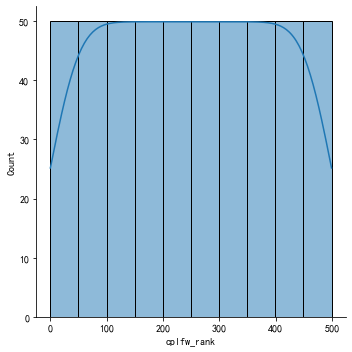

In [23]:
sns.displot(data=train_df, x=c, kde=True)
plt.savefig('./target_ori.png',dpi=300, quality=100)

C:\Users\45928\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  


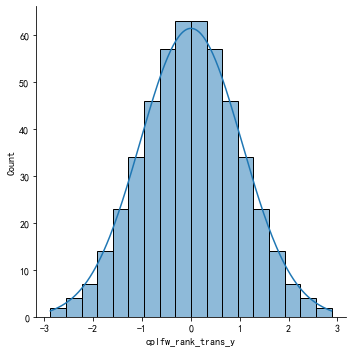

In [24]:
sns.displot(data=train_df, x=c+'_trans_y', kde=True)
plt.savefig('./target_erfinv_trans.png',dpi=300, quality=100)